# 빅데이터와 금융자료 분석 기말대체과제

20249132 김형환

## Question 1

![](image/bigdata1.png){width="70%" fig-align="center"}

### (1)
주어진 자료 중 범주형 변수 각각에 대해 적절한 전처리를 선택하고 진행하여라.

In [1]:
import numpy as np
import pandas as pd

bank = pd.read_csv('data/prob1_bank.csv')
bank.info() # 전체 11개 칼럼에 null값은 없으며, 범주형 9개 및 숫자형 2개

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   month      4521 non-null   object
 10  y          4521 non-null   object
dtypes: int64(2), object(9)
memory usage: 388.6+ KB


In [2]:
bank.select_dtypes(include='object').nunique()
# 범주형 9개 중, 목적변수를 포함하여 4개는 '여부'에 대한 이진변수이며 나머지는 3~12개의 고유값

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
y             2
dtype: int64

In [3]:
bank['job'].value_counts()
# 직업의 경우, 12개의 범주로 구성됨. 특별히 한 값에 치중되는 모습도 보이지 않고,
# 순서가 없으므로 원-핫 인코딩으로 처리 예정

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64

In [4]:
bank['marital'].value_counts()
# 결혼 여부는 싱글/결혼/이혼 3진변수임. 순서가 없으므로 원-핫 인코딩으로 처리 예정

marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64

In [5]:
bank['education'].value_counts()
# 학력에 대한 내용은 primary - secondary - tertiary 순이므로 1~3 라벨인코딩 처리 예정
# unknown은 학력수준이 낮을 가능성이 높을 것으로 추정, 0으로 처리하여 하나의 응답값으로 간주함.

education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64

In [6]:
bank['contact'].value_counts()
# 연락방법에 대한 내용은 telephone - cellular 순으로 연락이 편리하므로 1~2 라벨인코딩 처리 예정
# unknown은 연락 편의성이 가장 떨어질 것으로 보임. 0으로 처리하여 라벨인코딩 처리 예정

contact
cellular     2896
unknown      1324
telephone     301
Name: count, dtype: int64

In [7]:
bank['month'].value_counts()
# 달에 대한 내용으로, 1~12개월 순서에 따른 라벨인코딩 처리 예정

month
may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: count, dtype: int64

In [8]:
# 범주형 변수 처리

# 1. job, marital -> One-Hot Encoding
bank = pd.get_dummies(bank, columns=['job', 'marital'], drop_first=True)

# 2. education, contact, month > Label Encoding
edu_map = {'unknown': 0,'primary': 1,'secondary': 2,'tertiary': 3}
bank['education'] = bank['education'].map(edu_map)

contact_map = {'unknown': 0,'telephone': 1,'cellular': 2}
bank['contact'] = bank['contact'].map(contact_map)

month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
               'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
month_map = {month: i for i, month in enumerate(month_order)}
bank['month'] = bank['month'].map(month_map)

# 3. default, housing, loan, y > Label Encoding (binary, yes=1 / no=0)
binary_cols = ['default', 'housing', 'loan', 'y']
for col in binary_cols: bank[col] = bank[col].map({'yes': 1, 'no': 0})

print(bank.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                4521 non-null   int64
 1   education          4521 non-null   int64
 2   default            4521 non-null   int64
 3   balance            4521 non-null   int64
 4   housing            4521 non-null   int64
 5   loan               4521 non-null   int64
 6   contact            4521 non-null   int64
 7   month              4521 non-null   int64
 8   y                  4521 non-null   int64
 9   job_blue-collar    4521 non-null   bool 
 10  job_entrepreneur   4521 non-null   bool 
 11  job_housemaid      4521 non-null   bool 
 12  job_management     4521 non-null   bool 
 13  job_retired        4521 non-null   bool 
 14  job_self-employed  4521 non-null   bool 
 15  job_services       4521 non-null   bool 
 16  job_student        4521 non-null   bool 
 17  job_technician

### (2)
주어진 자료 중 수치형 변수 각각에 대해 적절한 전처리를 선택하고 진행하여라.

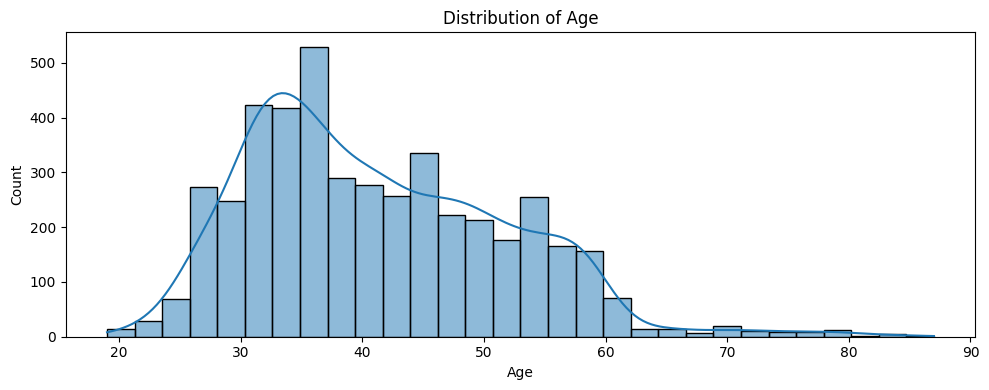

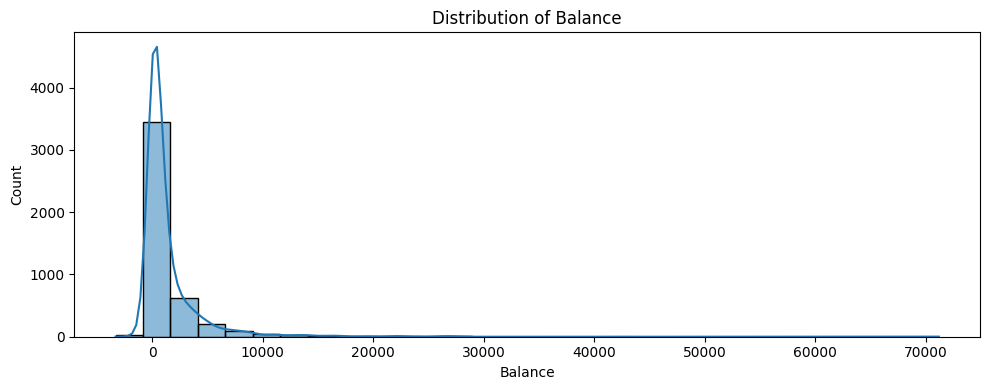

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. age 분포
plt.figure(figsize=(10, 4))
sns.histplot(bank['age'], bins=30, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 2. balance 분포
plt.figure(figsize=(10, 4))
sns.histplot(bank['balance'], bins=30, kde=True)
plt.title("Distribution of Balance")
plt.xlabel("Balance")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [10]:
bank['age'].describe()
# age는 오른쪽 skew가 미세하게 있는 정규분포와 가까운 형태. 표준화만 진행

count    4521.000000
mean       41.170095
std        10.576211
min        19.000000
25%        33.000000
50%        39.000000
75%        49.000000
max        87.000000
Name: age, dtype: float64

In [11]:
bank['balance'].describe()
# balance는 음수도 존재하고, 값이 매우 극단적으로 치우쳐져 있는 형태. log변환 및 표준화 진행
# 이후 LOF 방식으로 두 수치형변수에 대한 이상치 탐지, 약 1% 수준의 이상치 제거 예정

count     4521.000000
mean      1422.657819
std       3009.638142
min      -3313.000000
25%         69.000000
50%        444.000000
75%       1480.000000
max      71188.000000
Name: balance, dtype: float64

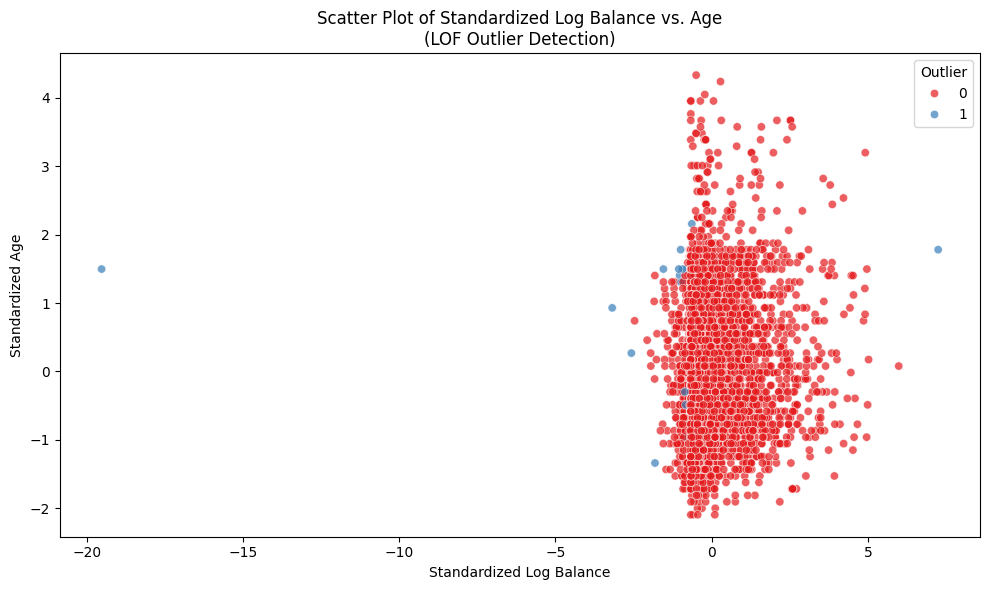

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

# 1. balance 로그변환 (음수 대비)
min_bal = bank['balance'].min()
bank['log_balance'] = np.log1p(bank['balance'] - min_bal + 1)

# 2. balance + age 표준화
scaler = StandardScaler()
bank[['std_log_balance', 'std_age']] = scaler.fit_transform(bank[['log_balance', 'age']])

# 3. LOF 이상치 탐지 (다변량: log_balance + age)
# 적절한 파라미터 조정으로 balance의 최소, 최대값을 효과적으로 제거
X_scaled = bank[['std_log_balance', 'std_age']]
lof = LocalOutlierFactor(n_neighbors=30, contamination=0.01)
bank['is_outlier'] = (lof.fit_predict(X_scaled) == -1).astype(int)

# 4. 이상치 시각화 (scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bank, x='std_log_balance', y='std_age',
                hue='is_outlier', palette='Set1', alpha=0.7)
plt.title("Scatter Plot of Standardized Log Balance vs. Age\n(LOF Outlier Detection)")
plt.xlabel("Standardized Log Balance")
plt.ylabel("Standardized Age")
plt.legend(title="Outlier")
plt.tight_layout()
plt.show()

In [13]:
# 이상치 1%가 제거된 것을 확인할 수 있음
bank_clean = bank[bank['is_outlier'] == 0].copy()
bank_clean

,age,education,default,balance,housing,loan,contact,month,y,job_blue-collar,...,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,log_balance,std_log_balance,std_age,is_outlier
0,30,1,0,1787,0,0,2,9,0,False,...,False,False,True,False,True,False,8.537388,0.431049,-1.056270,0
1,33,2,0,4789,1,1,2,4,0,False,...,False,False,False,False,True,False,9.000113,1.608188,-0.772583,0
2,35,3,0,1350,1,0,2,3,0,False,...,False,False,False,False,False,True,8.447843,0.203253,-0.583458,0
3,30,3,0,1476,1,1,0,5,0,False,...,False,False,False,False,True,False,8.474494,0.271052,-1.056270,0
4,59,2,0,0,1,0,0,4,0,True,...,False,False,False,False,True,False,8.106213,-0.665829,1.686036,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,32,2,0,473,1,0,2,6,0,False,...,False,False,False,False,False,True,8.239593,-0.326519,-0.867145,0
4516,33,2,0,-333,1,0,2,6,0,False,...,False,False,False,False,True,False,8.000349,-0.935138,-0.772583,0
4518,57,2,0,295,0,0,2,7,0,False,...,False,True,False,False,True,False,8.191463,-0.448959,1.496912,0
4519,28,2,0,1137,0,0,2,1,0,True,...,False,False,False,False,True,False,8.401109,0.084364,-1.245394,0


### (3)
주어진 자료에 클래스 불균형이 있는지 확인한 뒤, 이에 대한 적절한 전처리 방법을 선택하여 진행하여라.

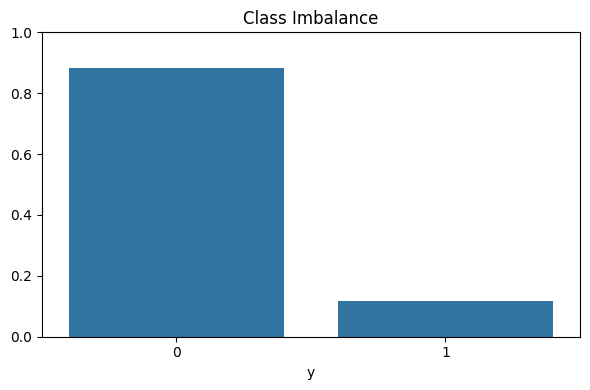

In [14]:
# 약 9:1로 0(No)의 비율이 압도적으로 많음. 클래스불균형 존재

class_counts = bank_clean['y'].value_counts(normalize=True)
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, legend=False)
plt.title("Class Imbalance")
plt.xlabel("y")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

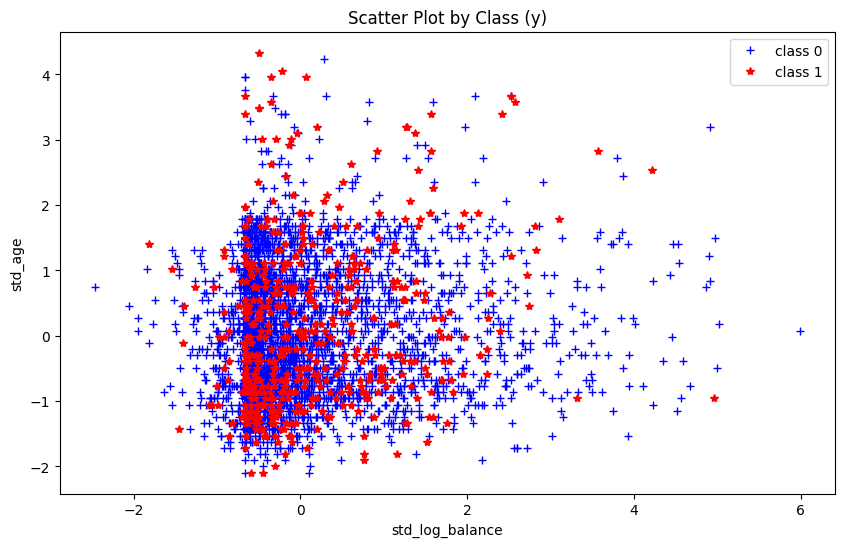

In [15]:
# 수치형 변수의 scatter plot상으로 특정 수치형 변수에 따른 치우침은 관측되지 않음.

X = bank_clean[['std_log_balance','std_age']]
y = bank_clean['y']
plt.figure(figsize=(10, 6))
plt.plot(X.loc[y == 0, 'std_log_balance'], X.loc[y == 0, 'std_age'], 'b+', label="class 0")
plt.plot(X.loc[y == 1, 'std_log_balance'], X.loc[y == 1, 'std_age'], 'r*', label="class 1")
plt.legend()
plt.xlabel("std_log_balance")
plt.ylabel("std_age")
plt.title("Scatter Plot by Class (y)")
plt.show()

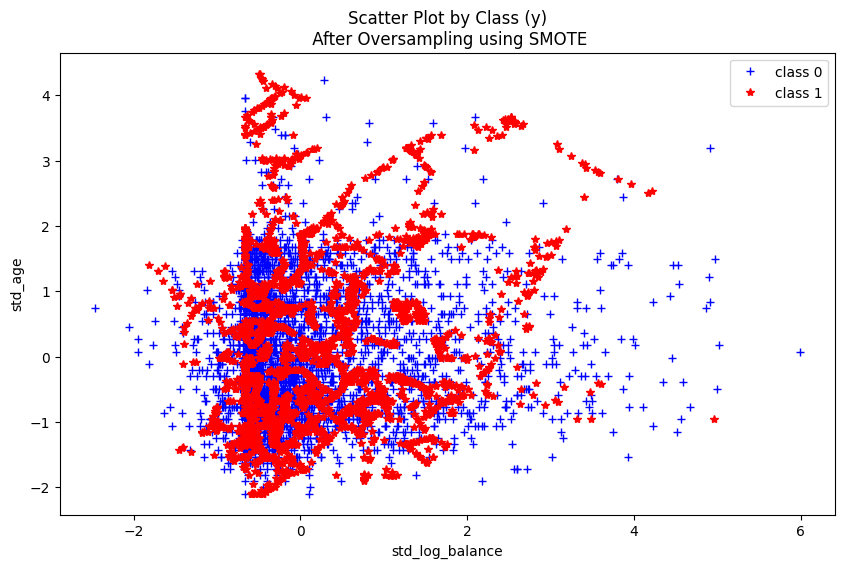

In [16]:
# 표본의 수가 적은 편이므로 oversampling 진행
# 데이터의 구조가 그다지 복잡하지 않아 SMOTE 알고리즘을 적용하여 처리
from imblearn.over_sampling import SMOTE

oversample1 = SMOTE()
OX, Oy = oversample1.fit_resample(X, y)
plt.figure(figsize=(10, 6))
plt.plot(OX.loc[Oy == 0, 'std_log_balance'], OX.loc[Oy == 0, 'std_age'], 'b+', label="class 0")
plt.plot(OX.loc[Oy == 1, 'std_log_balance'], OX.loc[Oy == 1, 'std_age'], 'r*', label="class 1")
plt.legend()
plt.xlabel("std_log_balance")
plt.ylabel("std_age")
plt.title("Scatter Plot by Class (y)\n After Oversampling using SMOTE")
plt.show()

## Question 2

![](image/bigdata2.png){width="70%" fig-align="center"}

### (1)
주어진 자료에 K평균 Clustering 알고리즘을 적용하여, 적절한 군집을 생성하여라.


In [17]:
df = pd.read_csv('data/prob2_card.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CUST_ID              8950 non-null   object 
 1   BALANCE              8950 non-null   float64
 2   BALANCE_FREQUENCY    8950 non-null   float64
 3   PURCHASES            8950 non-null   float64
 4   PURCHASES_FREQUENCY  8950 non-null   float64
 5   PURCHASES_TRX        8950 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 419.7+ KB


In [18]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,PURCHASES_FREQUENCY,PURCHASES_TRX
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,0.490351,14.709832
std,2081.531879,0.236904,2136.634782,0.401371,24.857649
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,128.281915,0.888889,39.635000,0.083333,1.000000
50%,873.385231,1.000000,361.280000,0.500000,7.000000
75%,2054.140036,1.000000,1110.130000,0.916667,17.000000
max,19043.138560,1.000000,49039.570000,1.000000,358.000000


In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# CUST_ID는 클러스터링에 사용하지 않으므로 제거
X = df.drop(columns=["CUST_ID"])

# 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# 최적 K 탐색
inertia_list = []
silhouette_list = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    inertia_list.append(kmeans.inertia_)
    silhouette_list.append(silhouette_score(X_scaled, labels))

best_k = K_range[silhouette_list.index(max(silhouette_list))]

# K평균 군집화 결과 : 6개의 군집으로 분류되었으며, 갯수는 32개~3200개로 천차만별
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
scaled_df["KMeans_Label"] = kmeans_final.fit_predict(X_scaled)

summary_table_kmean = scaled_df.groupby("KMeans_Label").mean()
summary_table_kmean["Count"] = scaled_df.groupby("KMeans_Label").size()
summary_table_kmean

,BALANCE,BALANCE_FREQUENCY,PURCHASES,PURCHASES_FREQUENCY,PURCHASES_TRX,Count
KMeans_Label,,,,,,
0,-0.679901,-2.105347,-0.305189,-0.528487,-0.414547,1390
1,1.906921,0.444930,10.782703,1.119309,5.892989,32
2,-0.331950,0.368356,0.087095,0.960328,0.227857,3253
3,-0.068576,0.366930,-0.369541,-0.895659,-0.502261,2989
4,0.696282,0.475045,2.042474,1.179006,2.713984,502
5,2.320551,0.483046,-0.159336,-0.433551,-0.273897,784


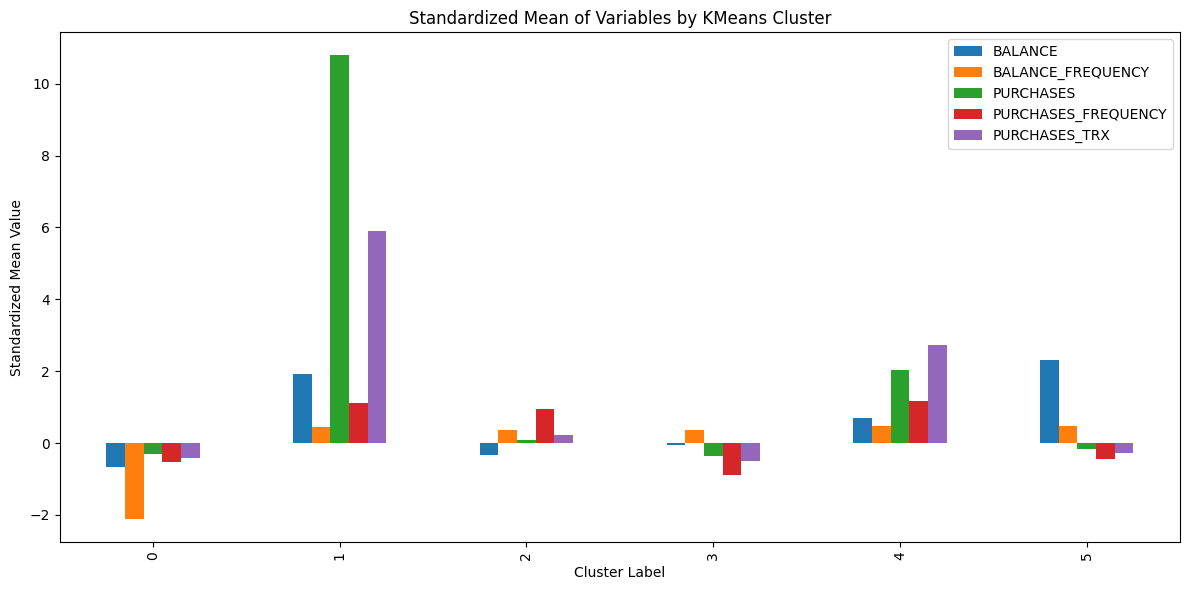

In [20]:
# K평균 군집화 시각화
summary_table_kmean.drop(columns="Count").plot.bar(figsize=(12, 6))
plt.title("Standardized Mean of Variables by KMeans Cluster")
plt.xlabel("Cluster Label")
plt.ylabel("Standardized Mean Value")
plt.tight_layout()

### (2)
주어진 자료에 DBSCAN Clustering 알고리즘을 적용하여, 적절한 군집을 생성하여라.

In [21]:
from sklearn.cluster import DBSCAN

# DBSCAN 분류 : eps 및 min_samples는 여러번 반복을 통해 최적의 조합을 도출하였음.
# 기준 : 분류가 너무 많거나 적지 않도록(3~6개), 너무 숫자가 적은 분류가 없도록
dbscan = DBSCAN(eps=0.6, min_samples=4)
labels = dbscan.fit_predict(X_scaled)

# 라벨을 데이터프레임에 추가
scaled_df["DBSCAN_Label"] = labels

# DBSCAN 군집화 결과 : 잡음(-1)이 약 2% 포함되어있으며, 총 5개의 군집으로 분류(177개~6200개)
summary_table_db = scaled_df.drop(columns="KMeans_Label").groupby("DBSCAN_Label").mean()
summary_table_db["Count"] = scaled_df.groupby("DBSCAN_Label").size()
summary_table_db

,BALANCE,BALANCE_FREQUENCY,PURCHASES,PURCHASES_FREQUENCY,PURCHASES_TRX,Count
DBSCAN_Label,,,,,,
-1,1.776034,0.211613,3.221764,0.832535,2.823087,261
0,-0.056781,-0.007807,-0.107234,-0.028259,-0.094781,8657
1,-0.355658,0.518084,3.714917,1.207553,4.079060,10
2,-0.397981,-0.121515,2.012334,-0.148985,-0.169367,6
3,2.124764,0.518084,2.221881,1.269843,3.919140,8
4,4.623668,0.518084,0.235086,0.231676,-0.199541,4
5,-0.384296,0.422144,4.876114,1.269843,3.340815,4


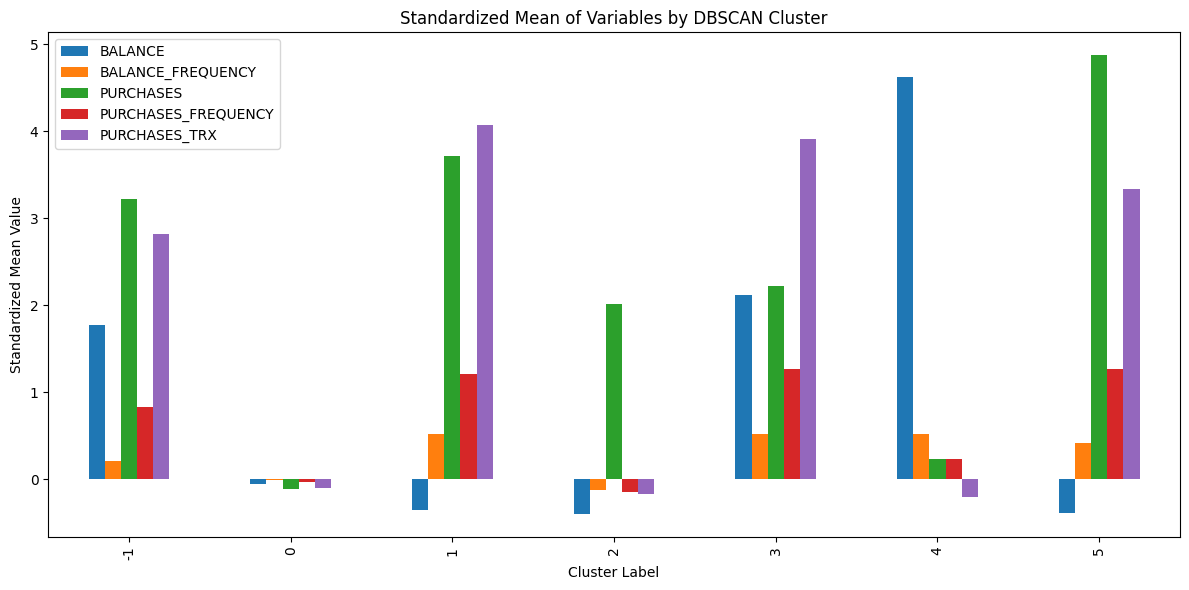

In [22]:
summary_table_db.drop(columns="Count").plot.bar(figsize=(12, 6))
plt.title("Standardized Mean of Variables by DBSCAN Cluster")
plt.xlabel("Cluster Label")
plt.ylabel("Standardized Mean Value")
plt.tight_layout()

### (3)
(1)과 (2)의 두 군집 분석 결과를 비교하고, 더 타당한 모델을 선택하여라.

**K평균 vs DBSCAN 군집화 결과 비교**

| 항목 | K평균 | DBSCAN |
|------|--------|--------|
| 클러스터 수 | 6개 | 6개 (`-1` 포함) |
| 클러스터 구성 | 최소 32, 최대 3253명 | 최소 4, 최대 8657 |
| 이상치 처리 | 없음  | `-1`로 261명 처리 |
| 군집별 특성 | 분류기준 명확하 | 분류기준 모호, 대부분 하나로 분류 |
| 시각적 해석력 | 변수별 차이 뚜렷 | 구분 어려움 |

결론 : 이 데이터에서는 **K평균이 더 타당한 군집화 방법**


### (4)
(3)에서 선택된 최종 모델로 생성한 군집들의 고객 특성을 분석하여라.

**K평균 군집화 군집별 특성**

`0` : 낮은 자산, 낮은 구매액, 낮은 구매횟수 -> 하위 고객군 (약 17.5%)

`1` : 높은 자산, 높은 구매액, 높은 구매횟수 -> 부유하고 이용량 많은 VIP 고객군 (약 0.5%)

`2` : 평균이하 자산, 평균적인 구매액, 평균이상 구매횟수 -> 일반 고객군 중 상위 이용고객 (약 35%)

`3` : 평균적인 자산, 평균이하 구매액, 평균이하 구매횟수 -> 일반 고객군 중 하위 이용고객 (약 33%)

`4` : 평균적인 자산, 높은 구매액, 높은 구매횟수 -> 평균적이나 카드 사용량이 많은 우량 고객군 (약 5%)

`5` : 높은 자산, 낮은 구매액, 낮은 구매횟수 -> 부유하나 카드를 이용하지 않는 잠재 고객군 (약 9%)

### (5)
t-SNE 알고리즘을 적용하여 주어진 자료를 2차원으로 축소하여라. 그 결과를, (3)에서 선택한 모델의 군집 레이블에 따라 점의 색상이 다르게 표현된 2차원 산점도로 시각화하여라.


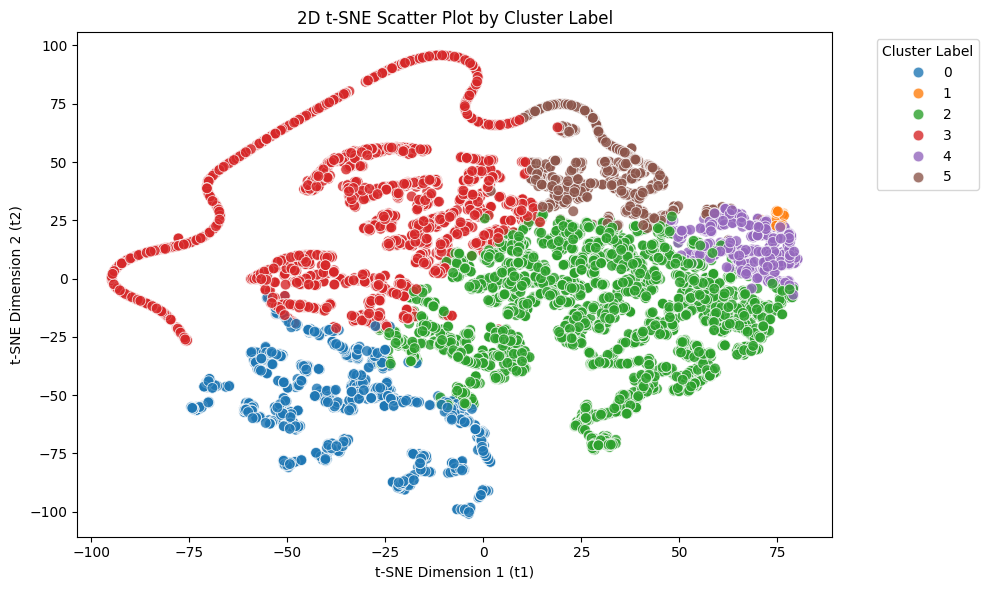

In [23]:
from sklearn.manifold import TSNE
tsne = TSNE( n_components=2 )
df2dim = tsne.fit_transform( X_scaled )
df2dim = pd.DataFrame( df2dim, columns=['t1','t2'] )
df2dim['Labels' ] = scaled_df["KMeans_Label"]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2dim, x="t1", y="t2", hue="Labels", palette="tab10", s=60, alpha=0.8)
plt.title("2D t-SNE Scatter Plot by Cluster Label")
plt.xlabel("t-SNE Dimension 1 (t1)")
plt.ylabel("t-SNE Dimension 2 (t2)")
plt.legend(title="Cluster Label", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

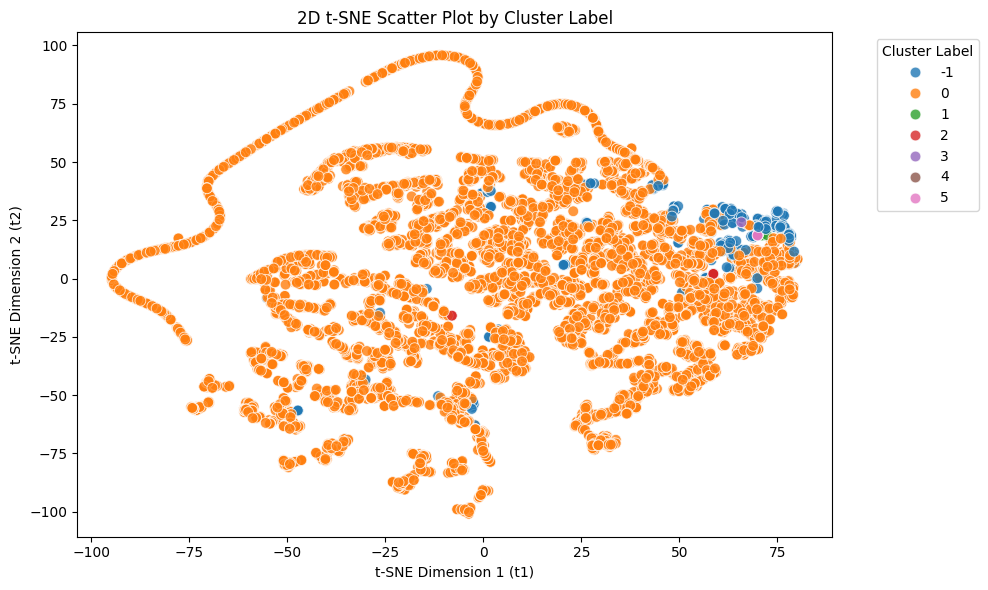

In [24]:
# 참고 : DBSCAN 시각화 결과
df2dim['Labels' ] = scaled_df["DBSCAN_Label"]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2dim, x="t1", y="t2", hue="Labels", palette="tab10", s=60, alpha=0.8)
plt.title("2D t-SNE Scatter Plot by Cluster Label")
plt.xlabel("t-SNE Dimension 1 (t1)")
plt.ylabel("t-SNE Dimension 2 (t2)")
plt.legend(title="Cluster Label", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Question 3

![](image/bigdata3.png){width="70%" fig-align="center"}

### (1)
XGBoost 알고리즘을 적용하여 트리를 생성한다고 할 때, 첫번째 트리의 첫 마디에서 최적의 분리기준이 무엇인지를 구하여라. 단, 결측이 아닌 4개의 관찰치(ID 1~ID 4)만 이용할 것. 제곱오차 손실함수를 적용하며, 모델 초기값 𝑓0는 0.5로 두고, 규제 하이퍼 파라미터 𝜆는 0으로 설정할 것. 또한 계산 과정을 상세하게 서술할 것.

**1. Gradient 및 Hessian 계산**

- 손실함수: $(y_i - \hat{y}_i)^2$
- 예측값: $\hat{y}_i = 0.5$
- Gradient: $g_i = \hat{y}_i - y_i = 0.5 - y_i$ 
- Hessian: $h_i = 1$ (제곱오차 손실함수는 상수)

| ID | $y_i$ | $g_i$ | $h_i$ |
|----|-------|-------|-------|
| 1  | 1.25  | -0.75 | 1     |
| 2  | 1.20  | -0.70 | 1     |
| 3  | 1.30  | -0.80 | 1     |
| 4  | 1.50  | -1.00 | 1     |

---

**2. Split 후보 및 Gain 계산**

Gain 공식 ($\lambda = 0$):

$$
\text{Gain} = \frac{1}{2} \left[ \frac{G_L^2}{H_L} + \frac{G_R^2}{H_R} - \frac{(G_L + G_R)^2}{H_L + H_R} \right]
$$

---

Split 1: $X \leq 1.5$

- Left: ID 2 → $G_L = -0.70$, $H_L = 1$  
- Right: ID 1, 3, 4 → $G_R = -2.55$, $H_R = 3$

$$
\text{Gain}_1 = \frac{1}{2} \left( 0.49 + 2.1675 - 2.640625 \right) = 0.0084
$$

---

Split 2: $X \leq 2.5$

- Left: ID 2, 3 → $G_L = -1.50$, $H_L = 2$  
- Right: ID 1, 4 → $G_R = -1.75$, $H_R = 2$

$$
\text{Gain}_2 = \frac{1}{2} \left( 1.125 + 1.53125 - 2.640625 \right) = 0.0078
$$

---

Split 3: $X \leq 3.5$

- Left: ID 1, 2, 3 → $G_L = -2.25$, $H_L = 3$  
- Right: ID 4 → $G_R = -1.00$, $H_R = 1$

$$
\text{Gain}_3 = \frac{1}{2} \left( 1.6875 + 1 - 2.640625 \right) = 0.0234
$$

---

**결론**

| Split 조건     | Gain     |
|----------------|----------|
| $X \leq 1.5$   | 0.0084   |
| $X \leq 2.5$   | 0.0078   |
| $X \leq 3.5$   | **0.0234** |

**최적 분리 기준**: $X \leq 3.5$

### (2)
XGBoost 알고리즘을 적용하여 트리를 생성한다고 할 때, 첫번째 트리의 첫 마디에서 X의 값이 결측인 경우는 왼쪽과 오른쪽 자식마디 중 어느 쪽으로 보내야 할지를 결정하여라.

위의 최적 분할 기준 $X \leq 3.5$에 따라, 아래 상황임.

- Left: ID 1, 2, 3 → $G_L = -2.25$, $H_L = 3$  
- Right: ID 4 → $G_R = -1.00$, $H_R = 1$

---

**1. 결측이 ID 5인 경우 ($Y = 1.4$)**

- $g_5 = 0.5 - 1.4 = -0.9$, $h_5 = 1$

*Case A: 왼쪽으로 보낼 경우*

- $G_L = -3.15$, $H_L = 4$
- $G_R = -1.00$, $H_R = 1$

$$
\text{Gain}_{5,\text{left}} = \frac{1}{2} \left( \frac{(-3.15)^2}{4} + \frac{(-1)^2}{1} - \frac{(-4.15)^2}{5} \right) = 0.0181
$$

*Case B: 오른쪽으로 보낼 경우*

- $G_L = -2.25$, $H_L = 3$
- $G_R = -1.9$, $H_R = 2$

$$
\text{Gain}_{5,\text{right}} = \frac{1}{2} \left( \frac{(-2.25)^2}{3} + \frac{(-1.9)^2}{2} - \frac{(-4.15)^2}{5} \right) = 0.0240
$$

**결론: 결측값이 ID 5인 경우, 오른쪽이 더 유리함**

---

**2. 결측이 ID 6인 경우 ($Y = 1.3$)**

- $g_6 = 0.5 - 1.3 = -0.8$, $h_6 = 1$

*Case A: 왼쪽으로 보낼 경우*

- $G_L = -3.05$, $H_L = 4$
- $G_R = -1.00$, $H_R = 1$

$$
\text{Gain}_{6,\text{left}} = \frac{1}{2} \left( \frac{(-3.05)^2}{4} + \frac{(-1)^2}{1} - \frac{(-4.05)^2}{5} \right) = 0.0229
$$

*Case B: 오른쪽으로 보낼 경우*

- $G_L = -2.25$, $H_L = 3$
- $G_R = -1.8$, $H_R = 2$

$$
\text{Gain}_{6,\text{right}} = \frac{1}{2} \left( \frac{(-2.25)^2}{3} + \frac{(-1.8)^2}{2} - \frac{(-4.05)^2}{5} \right) = 0.0135
$$

**결론: ID 6은 왼쪽이 더 유리함**

---

***요약***

| 결측 ID | $Y$ 값 | 왼쪽 Gain | 오른쪽 Gain | 더 나은 방향 |
|----------|--------|-------------|----------------|----------------|
| ID 5     | 1.4    | 0.0181      | 0.0240         | 오른쪽 |
| ID 6     | 1.3    | 0.0229      | 0.0135         | 왼쪽 |